In [1]:
%matplotlib inline

In [8]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-12-07_151901_sweep_stream_on_off_wideband/')

In [4]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]
all_snap = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [10]:
bin(all_sss[0].stream.roach_state.fft_shift_register)

'0b11111111111111110000'

In [5]:
num_channels = 1
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

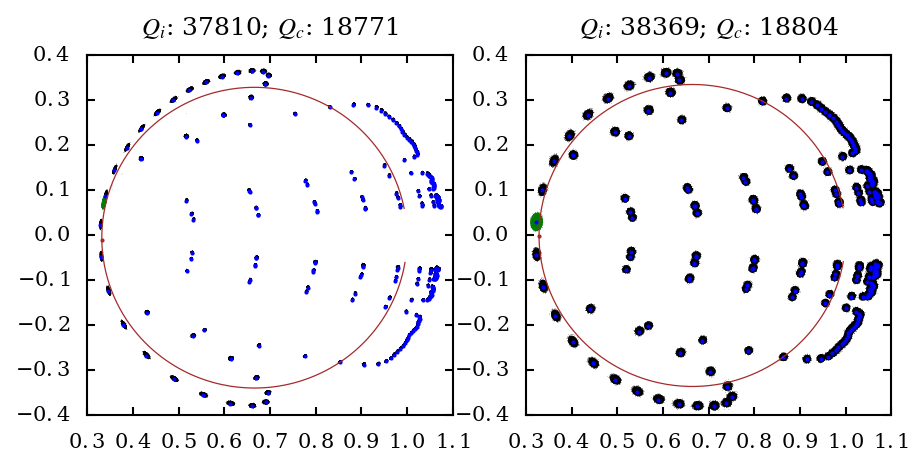

In [7]:
channel = 0
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_basic.sss_complex_plane(sss, ax)
    ax.set_title("$Q_i$: {:.0f}; $Q_c$: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real), fontsize=6)
    ax.tick_params(labelsize=5)

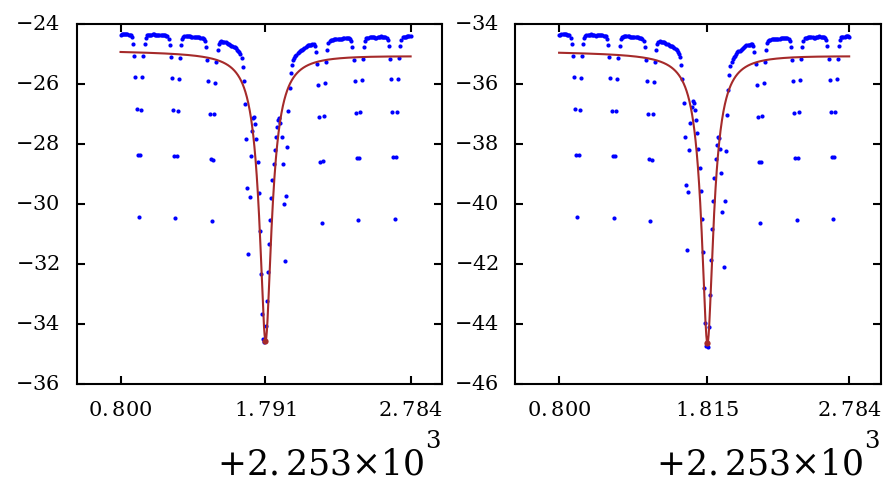

In [9]:
channel = 0
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for sss, ax in zip(sss_dict[channel], axes.flatten()):
    plot_resonator.amplitude(ax, sss.resonator)
    ax.tick_params(labelsize=5)